Kaggle link : https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification
this is a multi class classification dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/users/amulya/Downloads/dermatology_database_1.csv')
# df.head()
df['class'].value_counts()
null_values = df.isna().sum()
df.dtypes
df['age'] = pd.to_numeric(df['age'], errors='coerce')
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
df['age'] = df['age'].astype(int)
df['age'].corr(df['class'])
df_dummies = pd.DataFrame({'age': df['age']})
df_dummies['age_0to20'] = np.where(df['age'] <= 20, 1, 0)
df_dummies['age_20to40'] = np.where((df['age'] > 20) & (df_dummies['age'] <= 40), 1, 0)
df_dummies['age_40to60'] = np.where((df['age'] > 40) & (df_dummies['age'] <= 60), 1, 0)
df_dummies['age_above60'] = np.where(df['age'] > 60, 1, 0)
df = pd.concat([df, df_dummies], axis=1)
df = df.drop(df['age'], axis = 1)
df.head()
df.columns
for column in df.columns:
    classes = df[column].unique()
    print(f"Column: {column}")
    print(f"Categories: {classes}")
    print()
print(df.columns)

Column: erythema
Categories: [2 3 1 0]

Column: scaling
Categories: [2 3 1 0]

Column: definite_borders
Categories: [0 3 2 1]

Column: itching
Categories: [3 2 0 1]

Column: koebner_phenomenon
Categories: [0 1 2 3]

Column: polygonal_papules
Categories: [0 3 2 1]

Column: follicular_papules
Categories: [0 3 1 2]

Column: oral_mucosal_involvement
Categories: [0 3 2 1]

Column: knee_and_elbow_involvement
Categories: [1 0 3 2]

Column: scalp_involvement
Categories: [0 1 2 3]

Column: family_history
Categories: [0 1]

Column: melanin_incontinence
Categories: [0 1 2 3]

Column: eosinophils_infiltrate
Categories: [0 2 1]

Column: PNL_infiltrate
Categories: [0 1 3 2]

Column: fibrosis_papillary_dermis
Categories: [0 3 1 2]

Column: exocytosis
Categories: [3 1 0 2]

Column: acanthosis
Categories: [2 3 1 0]

Column: hyperkeratosis
Categories: [0 2 1 3]

Column: parakeratosis
Categories: [0 2 3 1]

Column: clubbing_rete_ridges
Categories: [0 2 1 3]

Column: elongation_rete_ridges
Categories: [0 

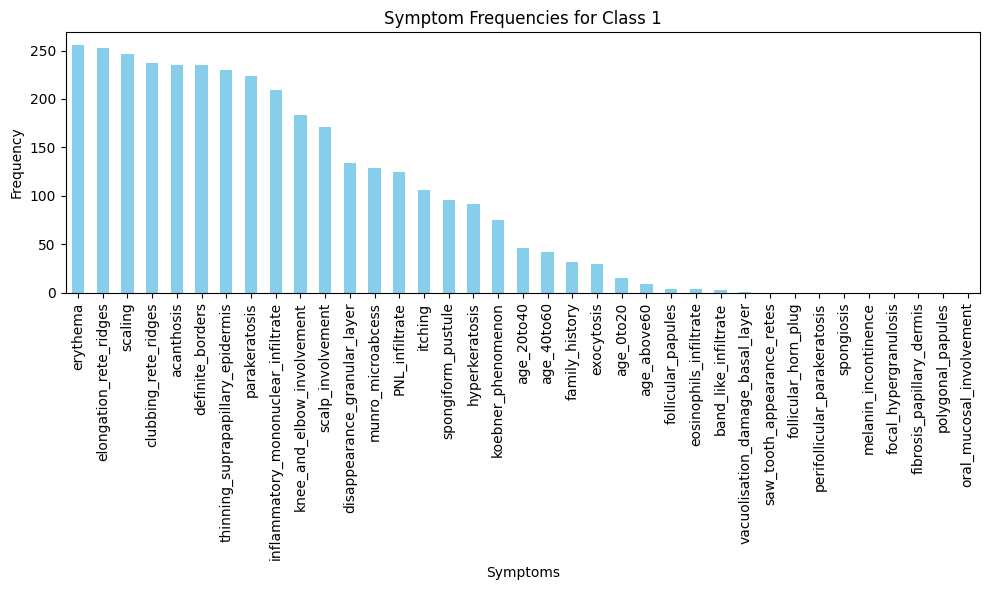

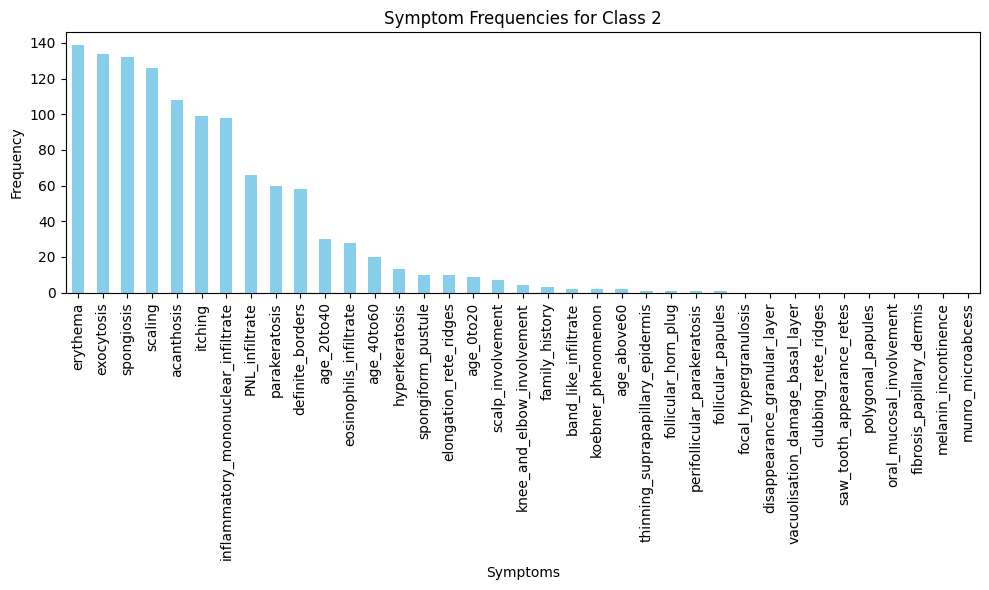

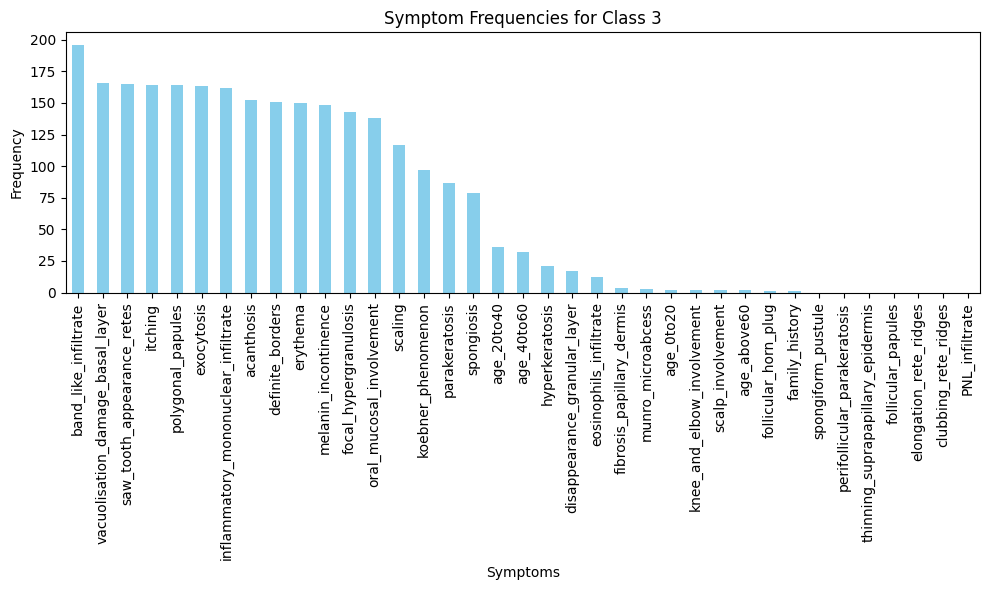

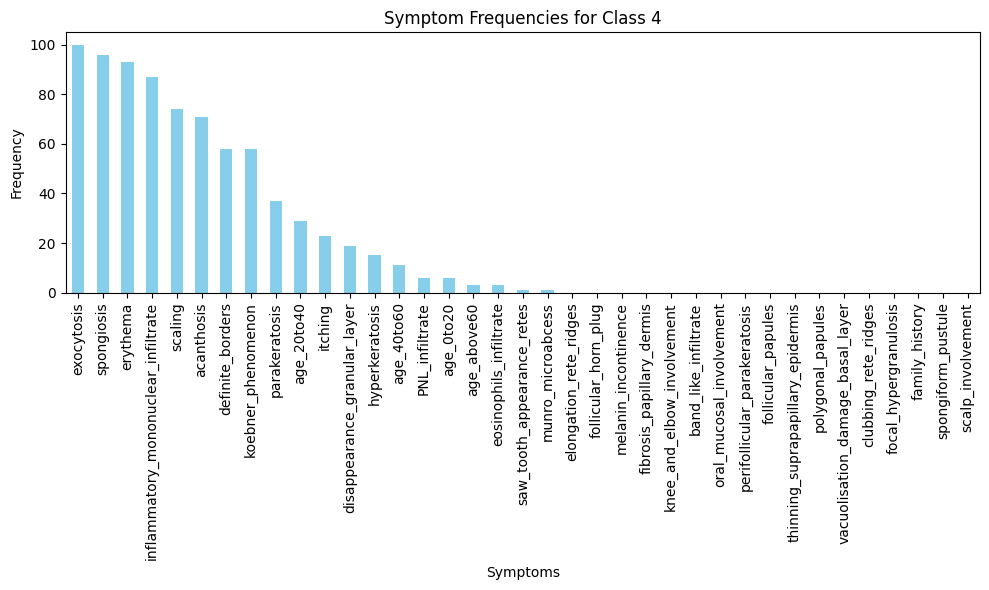

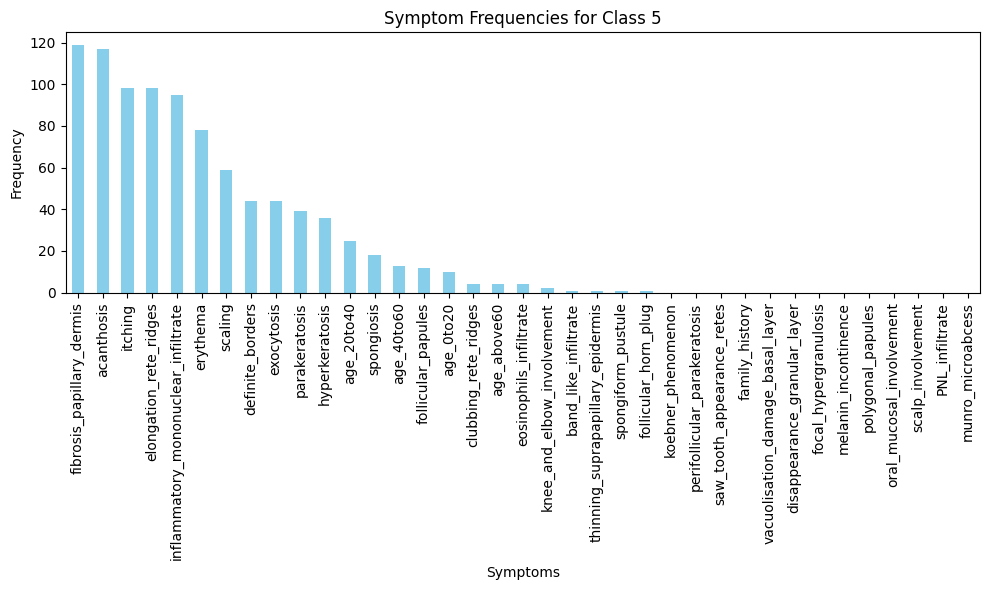

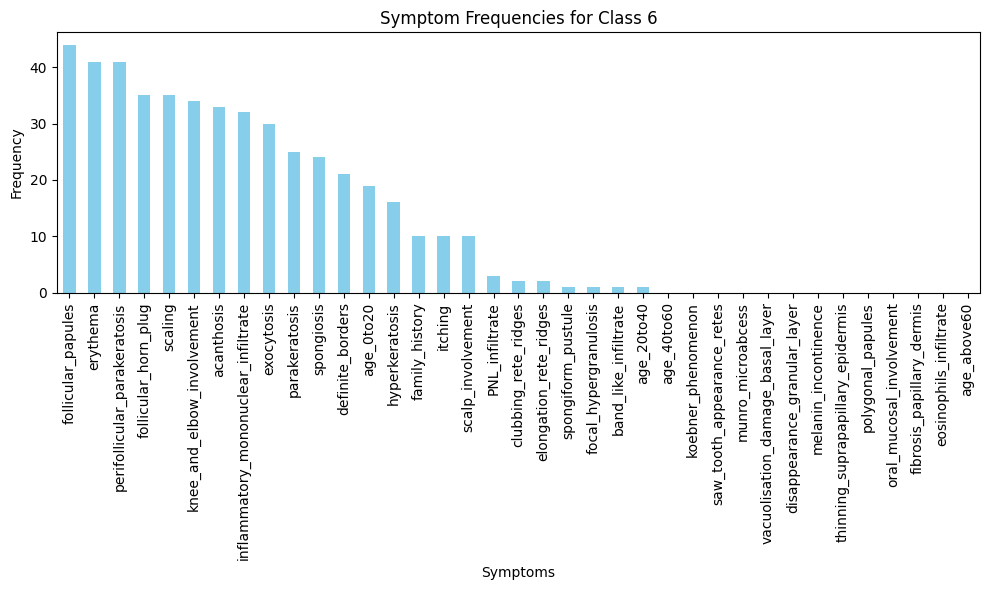

In [48]:
def plot_symptom_frequencies(class_label):
    class_df = df[df['class'] == class_label]
    symptom_frequency = class_df.drop(columns=['class']).sum().sort_values(ascending=False)
    # print(f"Class {class_label} Symptom Frequency:")
    # print(symptom_frequency)
    # print()
    plt.figure(figsize=(10, 6))
    symptom_frequency.plot(kind='bar', color='skyblue')
    plt.title(f"Symptom Frequencies for Class {class_label}")
    plt.xlabel("Symptoms")
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
for class_label in range(1, 7):
    plot_symptom_frequencies(class_label) 

In [63]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

y = df['class']
x = df.drop('class',axis = 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)
# X_scaled = pd.DataFrame(X_scaled, columns = df.columns)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_accuracy = accuracy_score(y_test, y_pred)
train_precision = precision_score(y_test, y_pred, average='weighted')
train_recall = recall_score(y_test, y_pred, average='weighted')
train_f1 = f1_score(y_test, y_pred, average='weighted')
print(f'accuracy : {train_accuracy}\nprecision:{train_precision}\nrecall:{train_recall}\nf1_score:{train_f1}')


accuracy : 0.9636363636363636
precision:0.9652680652680653
recall:0.9636363636363636
f1_score:0.96340718105424


In [64]:
y_train_pred = model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(accuracy_train)

1.0
